<a href="https://colab.research.google.com/github/edraalfig/mejoramiento/blob/main/prueba_mejoramieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=12f4457617c0884475acef55274954359ae2c94a15b886d41b3ec0025b15c1a8
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23606 sha256=39230876e16d06e6f8452480ac32f7c68767c9d72a52a7fd4a8e4d673b5e9dc7
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [2]:
import pandas as pd

fn = '/content/drive/MyDrive/eventlogs/ArtificialPatientTreatment.csv'
events = pd.read_csv(fn)

events.columns = ['patient', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])
events.head()

,patient,action,resource,datetime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [14]:
from pm4py.objects.conversion.log import converter as log_converter
eventlog = events.copy()

eventlog.rename(columns={'datetime': 'time:timestamp', 'patient': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)

from pm4py.objects.log.util.split_train_test import split
train, test = split(log,0.6)


In [15]:
len(test)

39

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

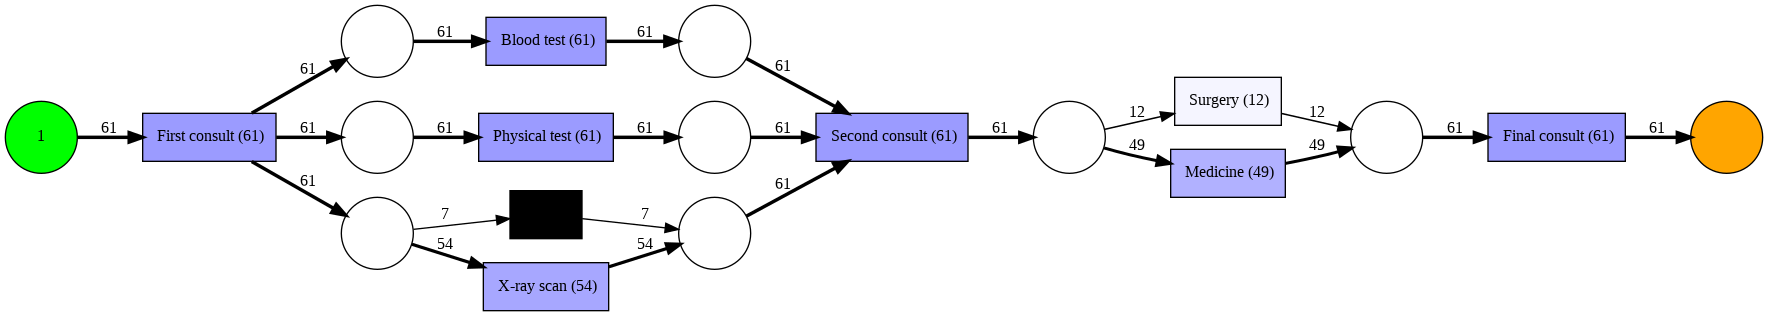

In [16]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
net, im, fm = inductive_miner.apply(train)

from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm,variant=pn_visualizer.Variants.FREQUENCY,log=train)
#pn_visualizer.view(gviz)
pn_visualizer.view(gviz)

#petrinet.element_usage_comparison.

In [17]:
from pm4py.algo.enhancement.comparison.petrinet.element_usage_comparison import compare_element_usage_two_logs as ceutl
diccionario1 = ceutl(net, im, fm, train, test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: compare_element_usage_two_logs is deprecated as of 2.2.5 and will be removed in 3.0.0. use pm4py.algo.comparison.petrinet.element_usage_comparison instead
  


replaying log with TBR, completed variants ::   0%|          | 0/14 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/13 [00:00<?, ?it/s]

In [18]:
diccionario1

{(461553c1-e359-42c1-82ce-c7d81639f82e, ' Blood test'): {'color': '#D5D7D7',
  'direction': -0.22,
  'label': ' Blood test (61/39/100)',
  'log1_occ': 61,
  'log2_occ': 39,
  'total_occ': 100},
 (461553c1-e359-42c1-82ce-c7d81639f82e, ' Blood test')->p_6: {'color': '#D5D7D7',
  'direction': -0.22,
  'label': ' Blood test (61/39/100)',
  'log1_occ': 61,
  'log2_occ': 39,
  'total_occ': 100},
 (552c8e57-fa9d-4f1b-b5c1-8fb47019c5b4, ' Medicine'): {'color': '#D5D7D7',
  'direction': -0.225,
  'label': ' Medicine (49/31/80)',
  'log1_occ': 49,
  'log2_occ': 31,
  'total_occ': 80},
 (552c8e57-fa9d-4f1b-b5c1-8fb47019c5b4, ' Medicine')->p_12: {'color': '#D5D7D7',
  'direction': -0.225,
  'label': ' Medicine (49/31/80)',
  'log1_occ': 49,
  'log2_occ': 31,
  'total_occ': 80},
 (5a478cdf-b224-4a43-a831-8907eb7f3463, ' Second consult'): {'color': '#D5D7D7',
  'direction': -0.22,
  'label': ' Second consult (61/39/100)',
  'log1_occ': 61,
  'log2_occ': 39,
  'total_occ': 100},
 (5a478cdf-b224-4a43-

#organizational_mining

In [8]:
from pm4py.algo.enhancement.organizational_mining.util import get_resources_from_log

In [9]:
dict2 = get_resources_from_log(log)

In [10]:
dict2

{' Dr. Alex': 5,
 ' Dr. Anna': 158,
 ' Dr. Ben': 50,
 ' Dr. Bob': 92,
 ' Dr. Charlie': 5,
 ' Dr. Quinn': 3,
 ' Dr. Rudy': 7,
 ' Lab': 100,
 ' Nurse Corey': 43,
 ' Nurse Jesse': 57,
 ' Pharmacy': 80,
 ' Team 1': 40,
 ' Team 2': 50}

#sna

In [11]:
from pm4py.algo.enhancement.sna import algorithm

In [12]:
snaresult = algorithm.apply(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. use pm4py.algo.organizational_mining.sna.algorithm instead
  """Entry point for launching an IPython kernel.


In [13]:
snaresult

[array([[0.        , 0.00909091, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00909091,
         0.00909091, 0.01818182, 0.02727273, 0.00909091, 0.05454545,
         0.09090909, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00909091, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.04545455, 0.01818182, 0.00909091,
         0.03636364, 0.00909091, 0.        ],
        [0.        , 0.        , 0.00909091, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00909091, 0.        , 0.        ,
         0.

In [ ]:
from pm4py.algo.enhancement.sna.util import cluster_affinity_propagation

In [ ]:
cluster_affinity_propagation(snaresult, parameters=None)

{'0': [' Dr. Anna'],
 '1': [' Dr. Ben',
  ' Dr. Bob',
  ' Dr. Rudy',
  ' Lab',
  ' Nurse Corey',
  ' Nurse Jesse',
  ' Team 1',
  ' Team 2'],
 '2': [' Pharmacy']}